# EDA DR DATASET (B4)

Number of images per class:
   train  test   val
0   8000  1000  1100
1   8331   840   830
2   8010   990  1000
3   7936   978  1000
4   7640  1180  1180


<Figure size 1000x500 with 0 Axes>

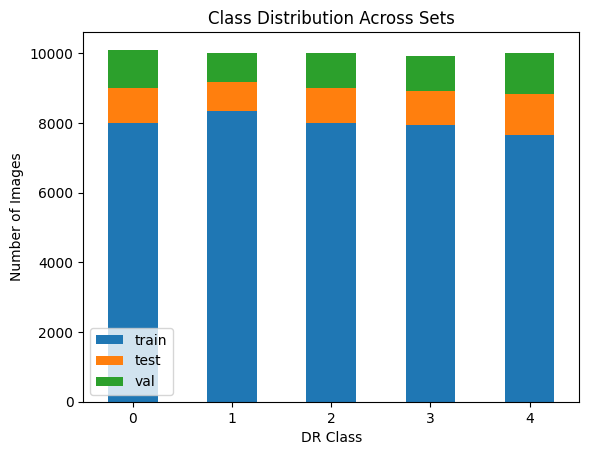

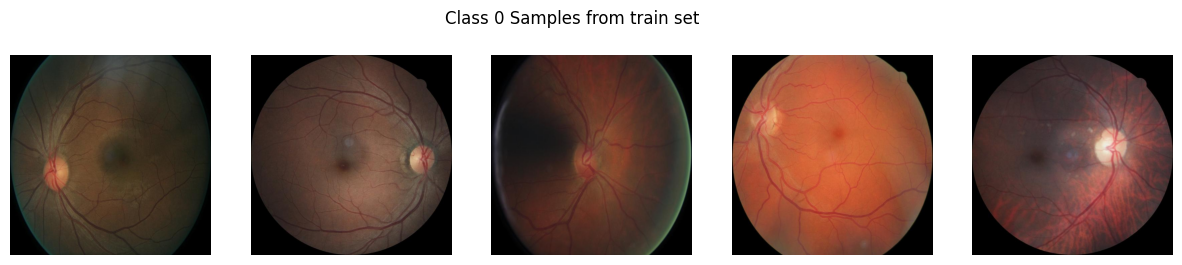

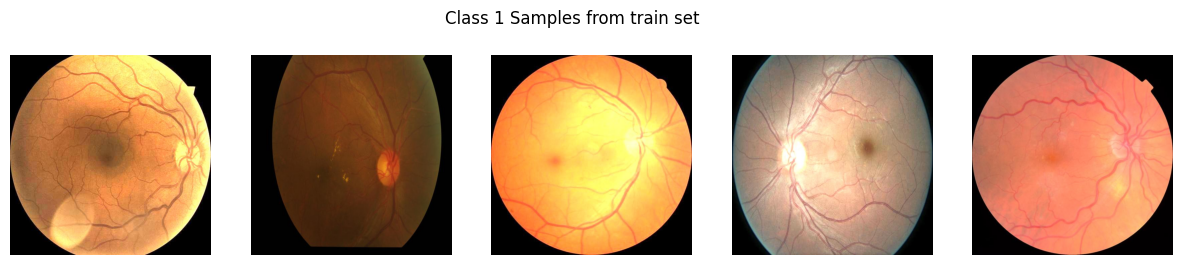

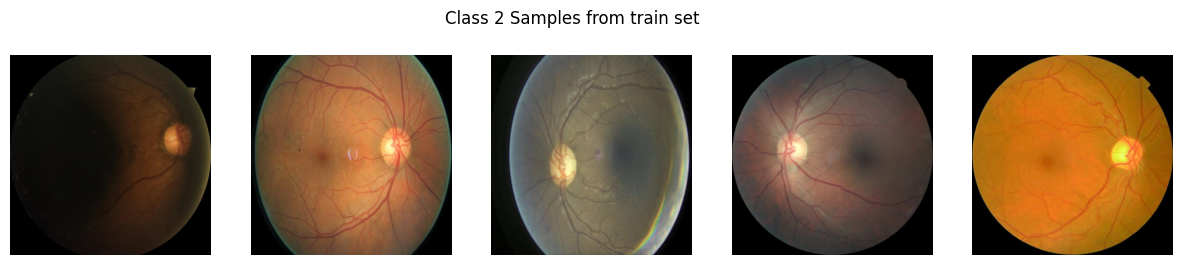

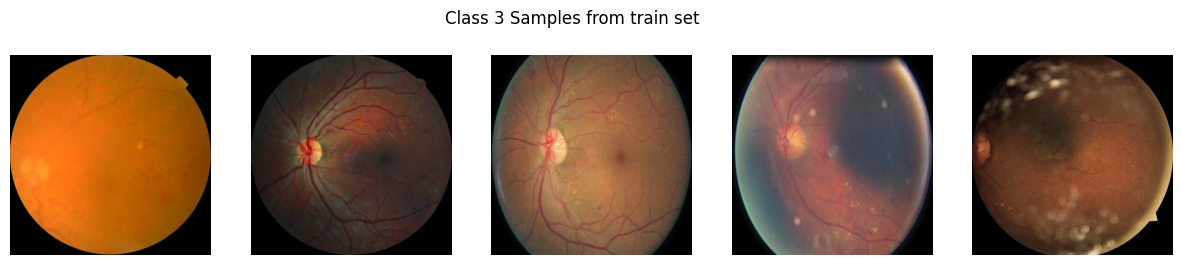

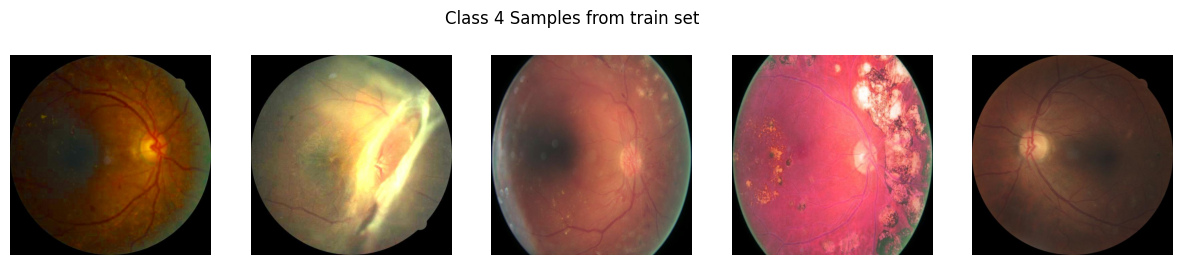

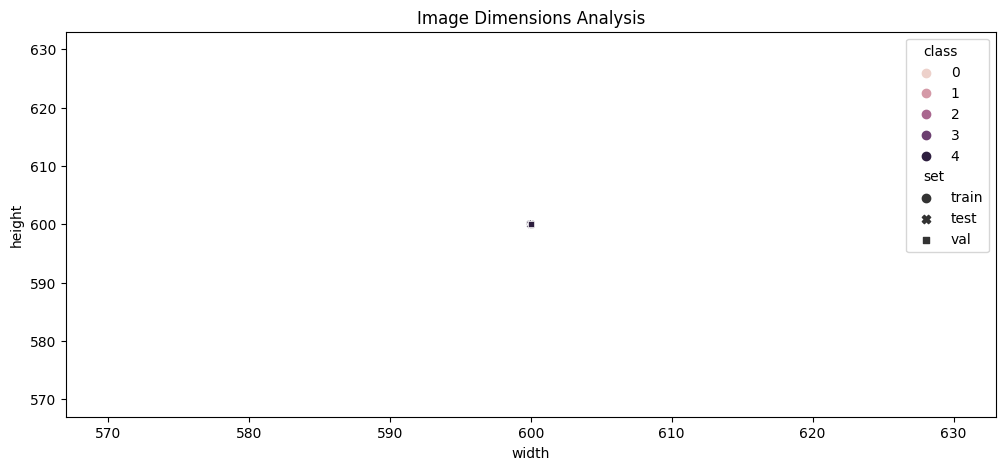

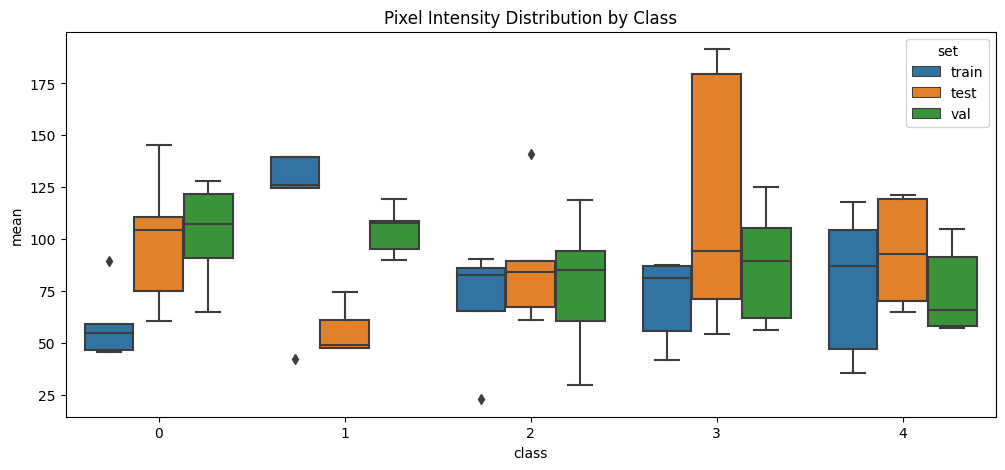

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set paths
data_paths = {
    'train': '/kaggle/input/dr-dataset/AUG-dataset/train',
    'test': '/kaggle/input/dr-dataset/AUG-dataset/test',
    'val': '/kaggle/input/dr-dataset/AUG-dataset/val'
}

# 1. Basic Statistics - Count images per class
class_counts = pd.DataFrame()

for set_name, path in data_paths.items():
    counts = []
    for class_num in range(5):  # Classes 0-4
        class_path = os.path.join(path, str(class_num))
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
        counts.append(num_images)
    class_counts[set_name] = counts

print("Number of images per class:")
print(class_counts)

# 2. Plot class distribution
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar', stacked=True)
plt.title('Class Distribution Across Sets')
plt.xlabel('DR Class')
plt.ylabel('Number of Images')
plt.xticks(range(5), rotation=0)
plt.show()

# 3. Sample image visualization
def show_samples(class_num, set_name='train', num_samples=5):
    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Class {class_num} Samples from {set_name} set')
    
    class_path = os.path.join(data_paths[set_name], str(class_num))
    sample_images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:num_samples]
    
    for i, img_name in enumerate(sample_images):
        img = Image.open(os.path.join(class_path, img_name))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Show samples from each class
for class_num in range(5):
    show_samples(class_num)

# 4. Image size analysis
sizes = []
for set_name in data_paths:
    for class_num in range(5):
        class_path = os.path.join(data_paths[set_name], str(class_num))
        img_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:10]  # Sample 10 per class
        
        for img_name in img_files:
            img = Image.open(os.path.join(class_path, img_name))
            sizes.append({'class': class_num, 'set': set_name, 
                         'width': img.width, 'height': img.height})

sizes_df = pd.DataFrame(sizes)

plt.figure(figsize=(12, 5))
sns.scatterplot(data=sizes_df, x='width', y='height', hue='class', style='set')
plt.title('Image Dimensions Analysis')
plt.show()

# 5. Pixel intensity distribution
def get_pixel_stats(img_path):
    img = Image.open(img_path)
    img_array = np.array(img)
    return {
        'mean': np.mean(img_array),
        'std': np.std(img_array),
        'min': np.min(img_array),
        'max': np.max(img_array)
    }

# Get stats for a sample of images
pixel_stats = []
for set_name in data_paths:
    for class_num in range(5):
        class_path = os.path.join(data_paths[set_name], str(class_num))
        img_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]
        
        for img_name in img_files:
            stats = get_pixel_stats(os.path.join(class_path, img_name))
            stats.update({'class': class_num, 'set': set_name})
            pixel_stats.append(stats)

pixel_df = pd.DataFrame(pixel_stats)

plt.figure(figsize=(12, 5))
sns.boxplot(data=pixel_df, x='class', y='mean', hue='set')
plt.title('Pixel Intensity Distribution by Class')
plt.show()